# 텐서플로를 사용해 간단한 선형 회귀 문제 풀어보기

이 노트북의 예제는 '텐서플로 첫걸음'에 있는 것을 활용하여 만들었습니다. 이 문제는 간단하게 하나의 특성을 가진 데이터셋을 가상으로 만들고 선형회귀로 이에 근사하는 1차 방정식을 찾는 문제입니다.

먼저 필요한 패키지로 NumPy와 matplotlib을 임포트합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NumPy를 사용해서 가상으로 1,000개의 데이터 포인트를 만듭니다.

x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. y1은 $0.1 \times x1+ 0.3$ 방정식을 이용해 만듭니다. 

이때 그럴싸하게 보이기 위해 평균값 0, 표준편차 0.03인 난수를 더하여 y축 방향으로 조금 흩어지게 만듭니다.

In [2]:
np.random.seed(42)
num_points = 1000
x_data = []
y_data = []
for i in range(num_points):
    x = np.random.normal(0.0, 0.55)
    x_data.append(x)
    y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    y_data.append(y)

만들어진 데이터를 산점도 그래프로 그려 보겠습니다.

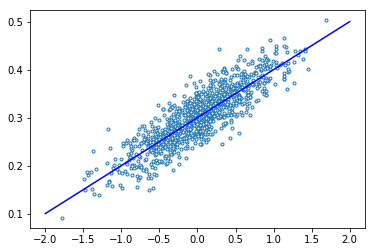

In [3]:
plt.plot(x_data, y_data, '.', markerfacecolor='white')
plt.plot([-2, 2], [-2*0.1+0.3, 2*0.1+0.3], color='blue');

이 x_data, y_data를 이용해 $y=0.1 \times x+0.3$의 방정식을 찾으려고 합니다. 구체적으로 알아내야 할 값은 0.1(기울기)과 0.3(절편)입니다.

먼저 텐서플로를 임포하겠습니다.

In [9]:
import tensorflow as tf

가중치 w와 b를 텐서플로 변수로 만들고 y를 얻는 방정식을 계산 그래프로 표현합니다.

In [5]:
w = tf.Variable(np.random.rand())
b = tf.Variable(0.)
y = w * x_data + b

선형회귀에서 최적화해야 할 비용함수는 MSE(mean square error)입니다. 직접 이 함수를 간단히 만들 수도 있지만 여기에서는 텐서플로에서 제공해 주는 함수를 사용하겠습니다.

In [6]:
cost = tf.losses.mean_squared_error(y_data, y)
optimizer = tf.train.GradientDescentOptimizer(0.5)
training_op = optimizer.minimize(cost)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

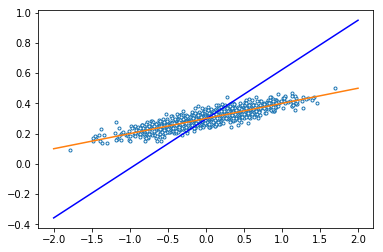

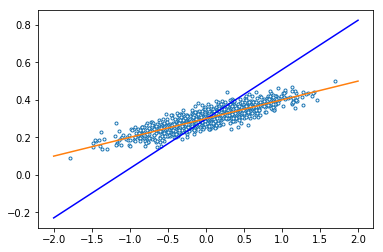

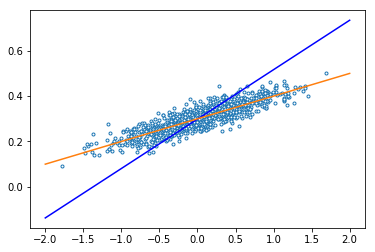

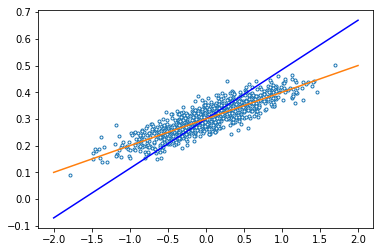

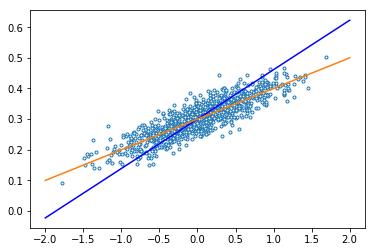

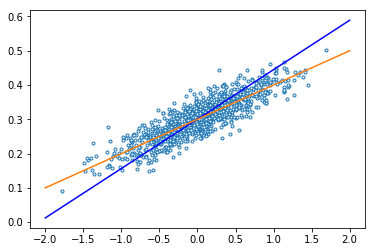

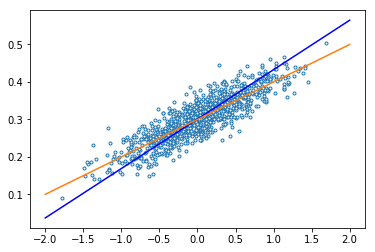

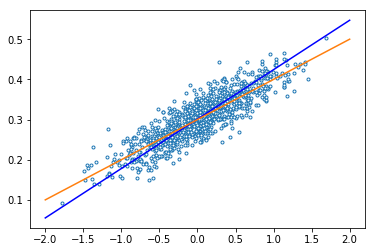

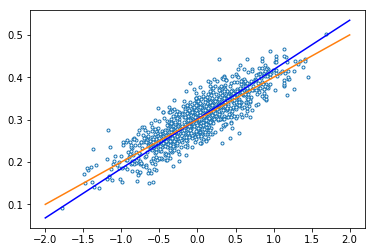

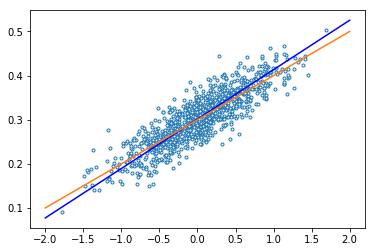

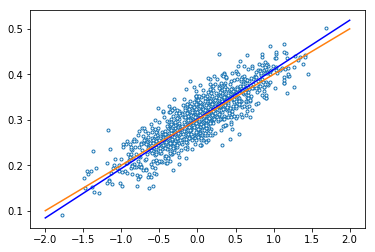

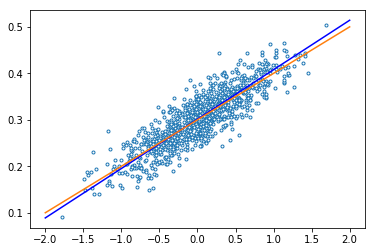

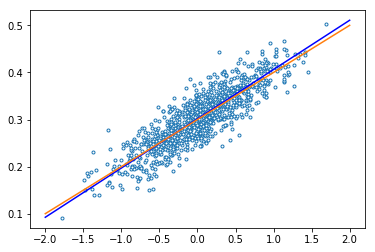

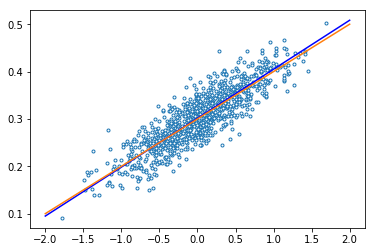

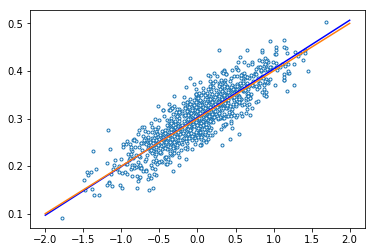

0.102459416 0.30164823 0.0009290677


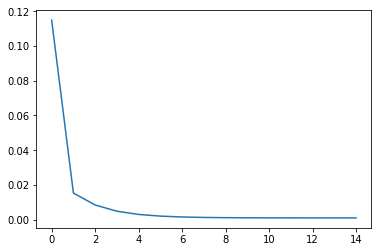

In [8]:
costs = []
for step in range(15):
    _, w_val, b_val, cost_val = sess.run([training_op, w, b, cost])
    costs.append(cost_val)
    # 산포도 그리기
    plt.plot(x_data, y_data, '.', markerfacecolor='white')
    
    # 학습된 직선 그리기
    plt.plot([-2, 2], [w_val * -2 + b_val, w_val * 2 + b_val], color='blue')
    # 원래 직선 그리기
    plt.plot([-2, 2], [-2*0.1+0.3, 2*0.1+0.3]);
    
    plt.show()
    
plt.plot(costs)
print(w_val, b_val, costs[-1])